# The curse of dimensionality

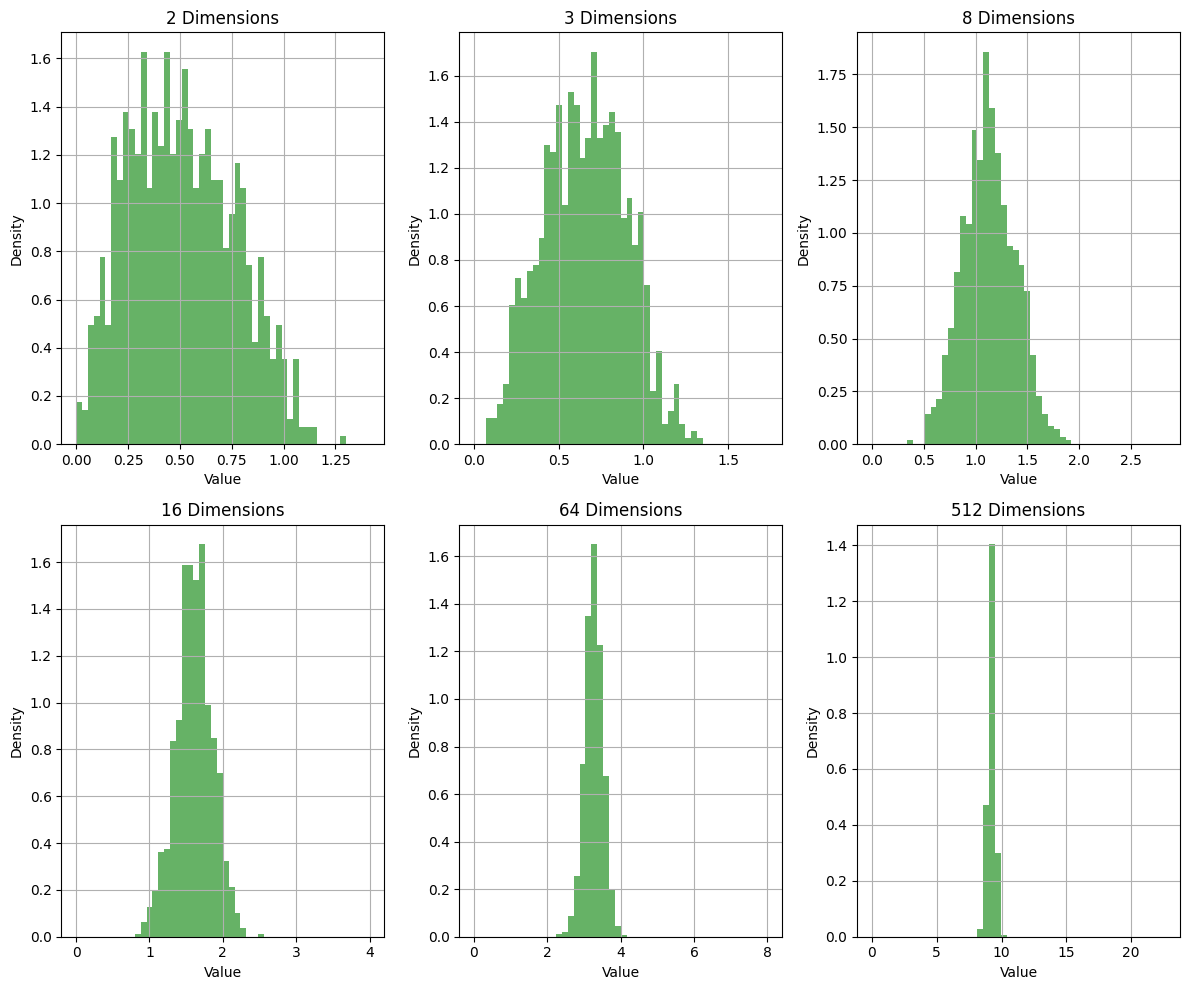

In [142]:
from random import random
from math import sqrt
import matplotlib.pyplot as plt
def vec(dim): return [random() for x in range(dim)]
def length(v): return sqrt(sum(x*x for x in v))
def dist(a, b): return length([a[i] - b[i] for i in range(len(a))])
def sample_lengths(dim, count): return [length(vec(dim)) for x in range(count)]
def sample_distances(dim, count): return [dist(vec(dim), vec(dim)) for x in range(count)]
def hist(data, dim, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the histogram on the axes object
    ax.hist(data, bins=50, density=True, alpha=0.6, range=(0, sqrt(dim)), color='g')
        
    # Set the labels and title using the axes object methods
    ax.set_title(f'{dim} Dimensions')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.grid(True)
    
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
dimensions = [2, 3, 8, 16, 64, 512]

for dim, ax in zip(dimensions, axes.flat):
    hist(sample_distances(dim, 1000), dim, ax)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Percent')

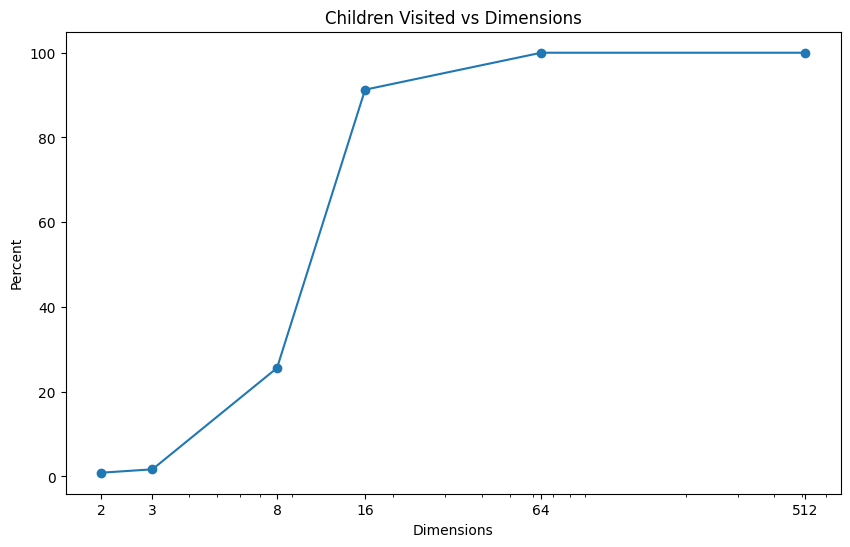

In [155]:
import subprocess

result = subprocess.run(
    ["dotnet", "run"],
    cwd="BallTree",
    capture_output=True,
    text=True
)

data = [tuple(int(x) for x in line.split(",")) for line in result.stdout.splitlines()]
dimensions, values= zip(*data)
values = [v/100.0 for v in values]

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.xticks(dimensions, labels=dimensions)
plt.plot(dimensions, values, marker='o')
plt.title('Children Visited vs Dimensions')
plt.xlabel('Dimensions')
plt.ylabel('Percent')



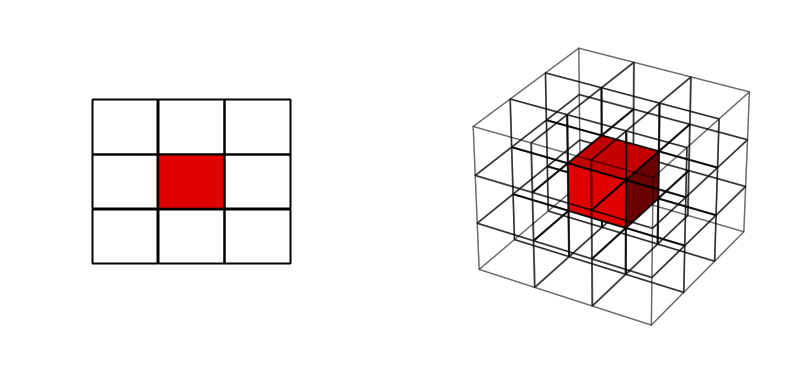

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'projection': '3d'})
# Create a 3x3x3 grid of voxels
voxels = np.ones((3, 3, 3), dtype=bool)

# Define colors: all cubes skyblue, central cube red
colors = np.full(voxels.shape, '#FFFFFF00', dtype=object)
colors[1, 1, 1] = 'red'  # Central cube
filled = np.full(voxels.shape, False, dtype=bool)

voxels = explode(voxels)
colors = explode(colors)

x, y, z = np.indices(np.array(voxels.shape) + 1).astype(float) 
y[:, 0::2, :] += 0.01
x[0::2, :, :] += 0.01
z[:, :, 0::2] += 0.01
x[1::2, :, :] += 0.99
y[:, 1::2, :] += 0.99
z[:, :, 1::2] += 0.99

# Plot the voxels
ax2.set_axis_off()
ax2.voxels(x, y, z, voxels,  facecolors=colors, edgecolor='#0000005A')

ax1.voxels(x, y, z, voxels,  facecolors=colors, edgecolor='#0000005A')
ax1.set_axis_off()
ax1.view_init(elev=0, azim=-90) # Adjust elevation and azimuth for front view
ax1.set_proj_type('ortho') # Set the projection type to orthogonal

plt.show()
